In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("examples/macrodata.csv")
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [5]:
data['year']

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [6]:
data['quarter']

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [9]:
index = pd.PeriodIndex(year=data['year'], quarter=data['quarter'], freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [12]:
data.index= index
data['infl']

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [14]:
close_px_all = pd.read_csv("examples/stock_px.csv",
                        parse_dates=True, index_col=0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [18]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [21]:
close_px = close_px.resample('B').ffill()
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


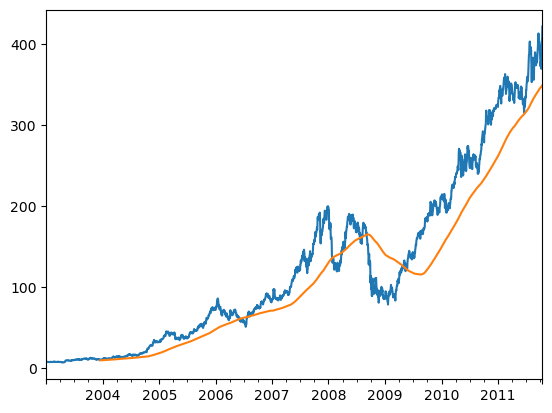

In [26]:
close_px['AAPL'].plot()
close_px['AAPL'].rolling(250).mean().plot();

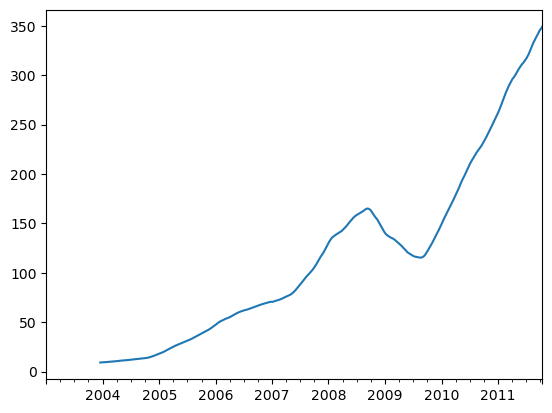

In [24]:
close_px['AAPL'].rolling(250).mean().plot();

In [33]:
plt.figure()
std250 = close_px['AAPL'].pct_change().rolling(250, min_periods=10).std()
std250[5:12]


2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

<Figure size 640x480 with 0 Axes>

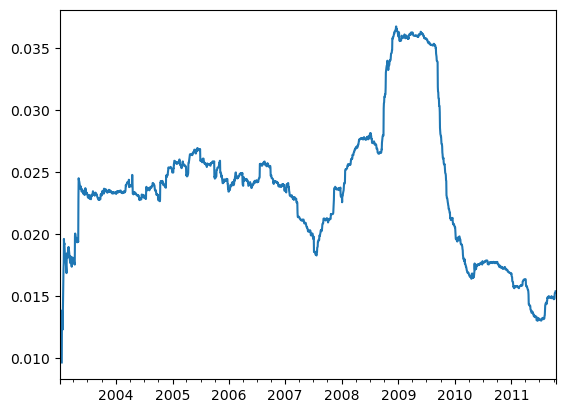

In [35]:
std250.plot();

<Axes: >

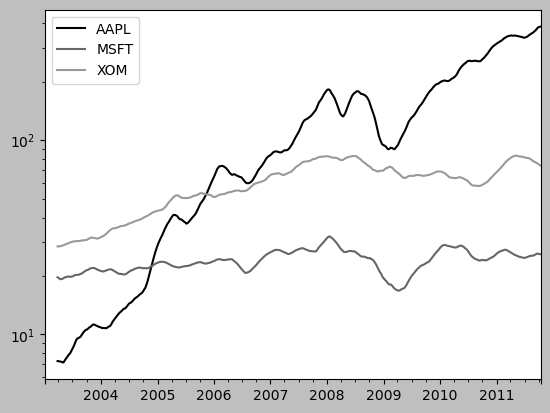

In [39]:
expanding_mean = std250.expanding().mean()
expanding_mean

plt.style.use('grayscale')
close_px.rolling(60).mean().plot(logy=True)

<Axes: >

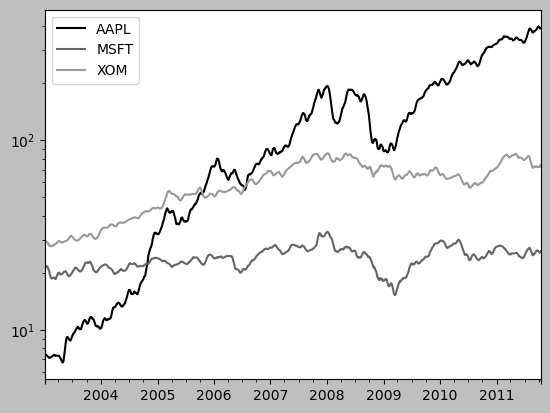

In [42]:
close_px.rolling('20D').mean()
close_px.rolling('20D').mean().plot(logy=True)

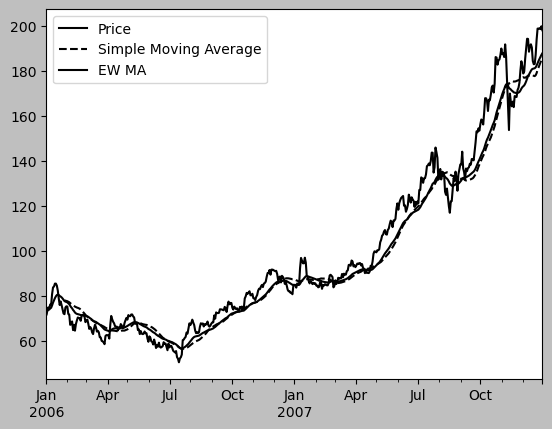

In [52]:
aapl_px = close_px['AAPL']['2006':'2007']
ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewma30 = aapl_px.ewm(span=30).mean()
aapl_px.plot(style='k-', label='Price')
ma30.plot(style='k--', label='Simple Moving Average')
ewma30.plot(style='k-', label='EW MA')
plt.legend();

<Axes: >

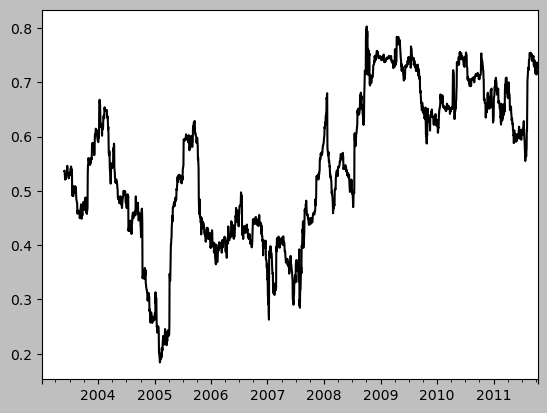

In [58]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
corr = returns['AAPL'].rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<Axes: >

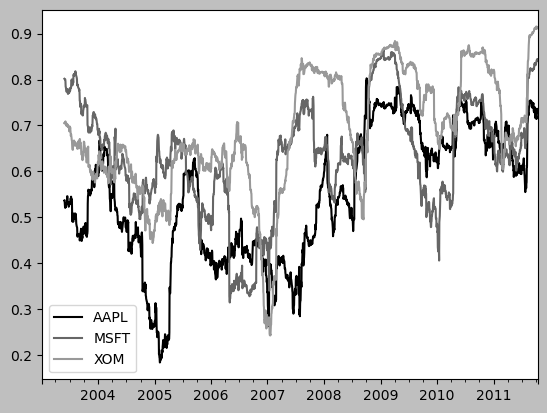

In [60]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [61]:
from scipy.stats import percentileofscore

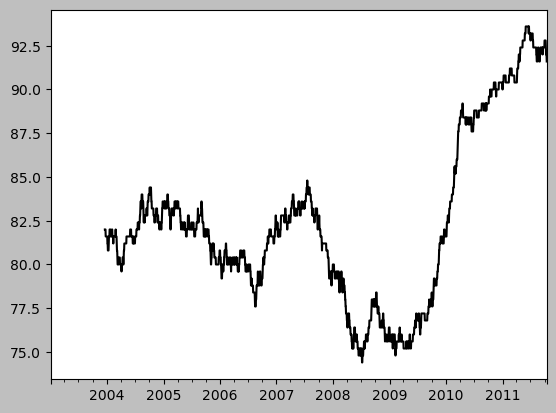

In [64]:
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

result = returns['AAPL'].rolling(250).apply(score_at_2percent)
result.plot();